In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.corr

<bound method DataFrame.corr of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [5]:
df.shape

(400, 5)

In [6]:
df.tail(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Heatmap for checking null values:

<AxesSubplot:>

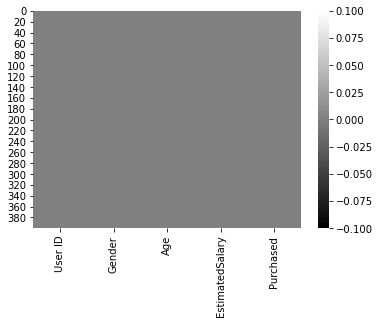

In [11]:
import seaborn as sns
sns.heatmap(df.isnull(),cmap='gray')

In [12]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

One-Hotencoding using get_dummies() method:

In [14]:
temp=pd.get_dummies(df.Gender)
temp

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [15]:
new=pd.concat([df,temp],axis=1)
new.drop(['Gender'],inplace=True,axis=1)
new

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [16]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
 4   Female           400 non-null    uint8
 5   Male             400 non-null    uint8
dtypes: int64(4), uint8(2)
memory usage: 13.4 KB


In [17]:
new.shape

(400, 6)

In [18]:
new.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Female', 'Male'], dtype='object')

In [19]:
target=new['Purchased']
features=new.drop(['Purchased'],axis=1)

In [20]:
x=features
y=target

In [21]:
x

,User ID,Age,EstimatedSalary,Female,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,1,0
3,15603246,27,57000,1,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,0,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

Logestic regression

In [24]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=LR.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score #accuracy score
accuracy_score(y_test,y_pred)

0.76

In [31]:
from sklearn.metrics import confusion_matrix #conusion matrix
confusion_matrix(y_test,y_pred)

array([[65,  0],
       [24, 11]], dtype=int64)

MinMaxScalar:

In [32]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_train=ms.fit_transform(x_train)

In [33]:
x_test=ms.transform(x_test)

In [34]:
x_train

array([[0.76906179, 0.4047619 , 0.17037037, 0.        , 1.        ],
       [0.62088056, 0.57142857, 0.48148148, 1.        , 0.        ],
       [0.36401164, 0.4047619 , 0.31851852, 0.        , 1.        ],
       ...,
       [0.21233811, 0.71428571, 0.11111111, 1.        , 0.        ],
       [0.17292504, 0.97619048, 0.54074074, 1.        , 0.        ],
       [0.13633639, 0.16666667, 0.13333333, 0.        , 1.        ]])

In [35]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred=LR.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score #accuracy score using minmaxscalar
accuracy_score(y_test,y_pred)

0.82

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[63,  2],
       [16, 19]], dtype=int64)

# random forest

In [40]:
target=new['Purchased']
features=new.drop(['Purchased'],axis=1)

In [59]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [61]:
temp=pd.get_dummies(df.Gender)
temp

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [62]:
new=pd.concat([df,temp],axis=1)
new.drop(['Gender'],inplace=True,axis=1)
new

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [63]:
x=features
y=target

In [64]:
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [66]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf,x,y, cv=5)
scores.mean()

0.8625

In [67]:
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [68]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score #accuracy score using randomforest
accuracy_score(y_test,y_pred)

0.93

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[62,  3],
       [ 4, 31]], dtype=int64)

# #regularization

In [49]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
parameters={'alpha':[1,2,8,10,15,20,40,80,150],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge=RidgeClassifier()
grid=GridSearchCV(estimator=ridge,param_grid=parameters,scoring='accuracy',cv=5)
grid.fit(x_train,y_train)

C:\Users\sreed\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\sreed\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\sreed\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\sreed\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\sreed\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\sreed\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\sreed\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [1, 2, 8, 10, 15, 20, 40, 80, 150],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='accuracy')

In [51]:
grid.best_params_

{'alpha': 150, 'solver': 'auto'}

In [52]:
grid.best_score_

0.8400000000000001

# svm

In [71]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [73]:
temp=pd.get_dummies(df.Gender)
temp

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [74]:
new=pd.concat([df,temp],axis=1)
new.drop(['Gender'],inplace=True,axis=1)
new

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [75]:
target=new['Purchased']
features=new.drop(['Purchased'],axis=1)

In [90]:
x=features
y=target

In [77]:
from sklearn import svm
regr = svm.SVC()
regr.fit(x_train,y_train)

SVC()

In [78]:
y_pred=regr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score #accuracy score using svm
accuracy_score(y_test,y_pred)

0.65

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[65,  0],
       [35,  0]], dtype=int64)

# naive bayes

In [84]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [86]:
new=pd.concat([df,temp],axis=1)
new.drop(['Gender'],inplace=True,axis=1)
new

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [88]:
target=new['Purchased']
features=new.drop(['Purchased'],axis=1)

In [91]:
x=features
y=target

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [93]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score  #accuracy score using naive bayes
accuracy_score(y_test,y_pred)

0.86

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[62,  3],
       [11, 24]], dtype=int64)